# Use a pretrained model from from Keras
Import weight matrices from HDF5-files exported from Keras/Tensorflow

### Keras/Tensorflow side:

```Python
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow import keras

mdl = VGG16(weights="imagenet")
mdl.save_weights("vgg16keras.h5", save_format="h5")
```

... that's it.

In [2]:
using HDF5
using Knet, CUDA
using Images, Colors
using NNHelferlein
using Augmentor

In [2]:
model_file = "vgg16keras.h5"
h = h5open(model_file)

🗂️ HDF5.File: (read-only) vgg16keras.h5
├─ 🏷️ backend
├─ 🏷️ keras_version
├─ 🏷️ layer_names
├─ 📂 block1_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block1_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block1_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block1_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block1_pool
│  └─ 🏷️ weight_names
├─ 📂 block2_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block2_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block2_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block2_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block2_pool
│  └─ 🏷️ weight_names
├─ 📂 block3_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_conv3
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv3
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_pool
│  └─ 🏷️ weight_names
├─ 📂 block4_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block4_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0

In [ ]:
read(h, "fc1/fc1/kernel:0") # check what is in object

### Build VGG net:

In [5]:
vgg = Classifier(
            Conv(h, "block1_conv1"),
            Conv(h, "block1_conv2"),
            Pool(),
            Conv(h, "block2_conv1"),
            Conv(h, "block2_conv2"),
            Pool(),
            Conv(h, "block3_conv1"),
            Conv(h, "block3_conv2"),
            Conv(h, "block3_conv3"),
            Pool(),
            Conv(h, "block4_conv1"),
            Conv(h, "block4_conv2"),
            Conv(h, "block4_conv3"),
            Pool(),
            Conv(h, "block5_conv1"),
            Conv(h, "block5_conv2"),
            Conv(h, "block5_conv3"),
            Pool(),
            PyFlat(python=true),
            Dense(h, "fc1", actf=relu),
            Dense(h, "fc2", actf=relu),
            Dense(h, "predictions", actf=identity)) ;

Generating layer from hdf with kernel (3,3), 3 channels, 64 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 64 channels, 64 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 64 channels, 128 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 128 channels, 128 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 128 channels, 256 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 256 channels, 256 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 256 channels, 256 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 256 channels, 512 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 512 channels, 5

# Predict images:

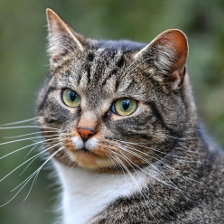

In [4]:
load(joinpath(NNHelferlein.DATA_DIR, "elecat_224", "cat-224.png"))

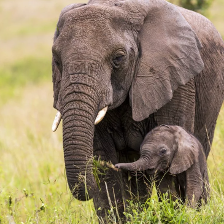

In [6]:
load(joinpath(NNHelferlein.DATA_DIR, "elecat_224", "ele-224.png"))

In [8]:
imgs = mk_image_minibatch("../data/elecat_224", 16, train=false, pre_proc=preproc_imagenet)

ImageLoader("../data/elecat_224", ["../data/elecat_224/cat-224.png", "../data/elecat_224/ele-224.png"], [0, 0], ["unknwon_class"], 16, true, [1, 2], false, nothing, NNHelferlein.preproc_imagenet, false, nothing)

In [9]:
pipl = CropRatio(ratio=1.0) |> Resize(224,224)
imgs2 = mk_image_minibatch("../data/elecat", 16, train=false, aug_pipl=pipl, pre_proc=preproc_imagenet)

ImageLoader("../data/elecat", ["../data/elecat/cat.jpg", "../data/elecat/elephant.jpg"], [0, 0], ["unknwon_class"], 16, true, [1, 2], false, 2-step Augmentor.ImmutablePipeline:
 1.) Crop to 1:1 aspect ratio
 2.) Resize to 224×224, NNHelferlein.preproc_imagenet, false, nothing)

In [ ]:
x = first(imgs2)

In [ ]:
vgg(x)

Use predict from NNHelferlein-Package:   
(ImageNet class-numbers differs by 1, because they are 0..999)

In [14]:
y = predict_imagenet(vgg, imgs2)

top-5 hits for sample 1: [387, 102, 386, 347, 24]
softmax       #   class label
   0.61     387   " 386: 'African elephant, Loxodonta africana'"
   0.25     102   " 101: 'tusker'"
   0.11     386   " 385: 'Indian elephant, Elephas maximus'"
   0.01     347   " 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis'"
   0.00      24   " 23: 'vulture'"
 
top-5 hits for sample 2: [283, 282, 286, 288, 723]
softmax       #   class label
   0.49     283   " 282: 'tiger cat'"
   0.47     282   " 281: 'tabby, tabby cat'"
   0.04     286   " 285: 'Egyptian cat'"
   0.00     288   " 287: 'lynx, catamount'"
   0.00     723   " 722: 'ping-pong ball'"
 


1000×2 Array{Float32,2}:
  3.18059   -0.945427
 -1.21708    0.601098
 -2.32378   -3.17137
  0.250045  -1.59488
  0.579682  -3.46108
  1.95889   -1.15518
  2.3298    -4.69415
  3.04401   -0.96068
  6.41559   -1.41105
  7.21777   -0.575874
 -0.300324  -1.79322
 -1.07903   -1.54671
  3.05797   -0.447105
  ⋮         
 -0.728848   2.04575
 -1.20549    1.49518
 -1.2678    -1.26163
 -1.32749   -1.87811
 -1.71992   -4.3291
  1.69273   -3.52547
  0.219818  -3.69135
  1.92811   -2.9367
  1.85778   -2.93143
  2.57854   -2.49449
  1.08149    7.43323
 -0.408616   4.78986